In [ ]:
#Some of the uesed libraries
import numpy as np
import pandas as pd
import re
import string
from sklearn.feature_extraction import _stop_words
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
'''
First of all we read the data (I'm using colab for better performance, to run the code on your machine
you have to change the dataset path )
'''
data = pd.read_csv("/content/Spam_Email_Data.csv",sep='\t') #the \t to seperate the data as in the csv file
data.text=data.text.astype(str)

In [ ]:
data

,text,target
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0
...,...,...
5791,From ilug-admin@linux.ie Mon Jul 22 18:12:45 2...,0
5792,From fork-admin@xent.com Mon Oct 7 20:37:02 20...,0
5793,Received: from hq.pro-ns.net (localhost [127.0...,1
5794,From razor-users-admin@lists.sourceforge.net T...,0


In [ ]:
'''
spliting the data randomly (80-20)
it's better in most cases -> helps ensure that the two sets have a similar distribution of data -> higher accuracy and prevent overfitting
I've tried (50-50) and it was disaster (:
'''
x_train, x_test, y_train, y_test = train_test_split(data.text,data.target,test_size = 0.2)

x_train.shape

(4636,)

In [ ]:
'''
 preprocessing the data
 (This part is to make sure that we only use the important part in each email which is the text)
'''
def remove_hyperlink(word):
    if isinstance(word, str):
        return re.sub(r"http\S+", "", word)
    else:
        return word


def remove_number(word):
    if isinstance(word, str):
        result = re.sub(r'\d+', '', word)
        return result
    else:
        return word

def remove_punctuation(word):
    result = word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result

def remove_whitespace(word):
    result = word.strip()
    return result

def replace_newline(word):
    if isinstance(word, str):
        return word.replace('\n','')
    else:
        return word



def clean_up_pipeline(sentence):
    cleaning_utils = [remove_hyperlink,
                      replace_newline,
                      remove_number
                    ]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence

cleaned_x_train = [clean_up_pipeline(o) for o in x_train]
cleaned_x_test = [clean_up_pipeline(o) for o in x_test]

In [ ]:
'''
Encode target labels with value between 0 and n_classes-1
In this datset the labels are already 0 and 1 but I faced an issues (it considered part of them as float)
and the LabelEncoder fixed it
'''
le = LabelEncoder()
train_y_labeled = le.fit_transform(y_train.values)
test_y_labeled = le.transform(y_test.values)

In [ ]:
train_y_labeled

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
#tokenization
embed_size = 100 # size of the word vector
max_feature = 50000 #  number of rows in the embedding vector
max_len = 2000 # max number of words in a question to use


tokenizer = Tokenizer(num_words=max_feature)

tokenizer.fit_on_texts(cleaned_x_train)

x_train_features = np.array(tokenizer.texts_to_sequences(cleaned_x_train), dtype="object")
x_test_features = np.array(tokenizer.texts_to_sequences(cleaned_x_test), dtype="object")

x_train_features[0]

[4,
 64,
 16,
 37,
 86,
 11,
 72,
 99,
 87,
 94,
 64,
 138,
 37,
 86,
 11,
 84,
 1,
 93,
 14,
 22,
 30,
 9,
 15,
 4,
 14,
 122,
 10,
 71,
 9,
 59,
 12,
 24,
 13,
 608,
 7,
 35,
 14,
 72,
 99,
 78,
 15,
 4,
 122,
 10,
 14,
 12,
 115,
 108,
 7,
 35,
 14,
 102,
 106,
 72,
 99,
 78,
 15,
 4,
 162,
 11,
 212,
 162,
 11,
 10,
 74,
 75,
 9,
 12,
 24,
 13,
 23809,
 7,
 35,
 64,
 71,
 9,
 72,
 99,
 15,
 4,
 499,
 435,
 162,
 11,
 14,
 10,
 162,
 11,
 162,
 12,
 24,
 13,
 23810,
 72,
 99,
 15,
 4,
 101,
 62,
 161,
 3,
 101,
 62,
 161,
 3,
 10,
 162,
 11,
 162,
 12,
 101,
 13,
 15724,
 7,
 64,
 16,
 86,
 11,
 72,
 99,
 15,
 4,
 327,
 233,
 7599,
 12,
 119,
 10,
 101,
 62,
 2863,
 2230,
 161,
 3,
 12,
 101,
 99,
 34,
 1131,
 5567,
 51,
 441,
 826,
 4,
 239,
 762,
 13920,
 1926,
 8453,
 8454,
 7599,
 161,
 276,
 382,
 1,
 64,
 138,
 86,
 11,
 44,
 68,
 73,
 119,
 110,
 505,
 19,
 196,
 583,
 1367,
 60,
 13,
 604,
 23811,
 104,
 57,
 19,
 731,
 289,
 1,
 54,
 368,
 289,
 1,
 54,
 368,
 44,
 153,
 13

In [ ]:
#Padding
x_train_features = pad_sequences(x_train_features,maxlen=max_len)
x_test_features = pad_sequences(x_test_features,maxlen=max_len)
x_train_features[0]

array([ 0,  0,  0, ..., 16, 86, 11], dtype=int32)

In [ ]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional
from keras.models import Model

# The first model
import tensorflow as tf
embedding_vecor_length = 32

model = tf.keras.Sequential()
model.add(Embedding(max_feature, embedding_vecor_length, input_length=max_len))
model.add(Bidirectional(tf.keras.layers.LSTM(64)))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2000, 32)          1600000   
                                                                 
 bidirectional (Bidirection  (None, 128)               49664     
 al)                                                             
                                                                 
 dense (Dense)               (None, 16)                2064      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1651745 (6.30 MB)
Trainable params: 1651745 (6.30 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
history = model.fit(x_train_features, train_y_labeled, batch_size=512, epochs=10, validation_data=(x_test_features, test_y_labeled))

Epoch 1/10
10/10 [==============================] - 13s 434ms/step - loss: 0.6765 - accuracy: 0.6296 - val_loss: 0.6359 - val_accuracy: 0.6716
Epoch 2/10
10/10 [==============================] - 4s 413ms/step - loss: 0.6129 - accuracy: 0.6732 - val_loss: 0.5212 - val_accuracy: 0.6724
Epoch 3/10
10/10 [==============================] - 4s 364ms/step - loss: 0.4473 - accuracy: 0.7334 - val_loss: 0.3338 - val_accuracy: 0.8922
Epoch 4/10
10/10 [==============================] - 3s 350ms/step - loss: 0.2848 - accuracy: 0.9420 - val_loss: 0.2359 - val_accuracy: 0.9784
Epoch 5/10
10/10 [==============================] - 4s 407ms/step - loss: 0.1684 - accuracy: 0.9836 - val_loss: 0.1007 - val_accuracy: 0.9819
Epoch 6/10
10/10 [==============================] - 4s 420ms/step - loss: 0.0489 - accuracy: 0.9948 - val_loss: 0.0458 - val_accuracy: 0.9888
Epoch 7/10
10/10 [==============================] - 4s 356ms/step - loss: 0.0223 - accuracy: 0.9953 - val_loss: 0.0459 - val_accuracy: 0.9888
Epoch

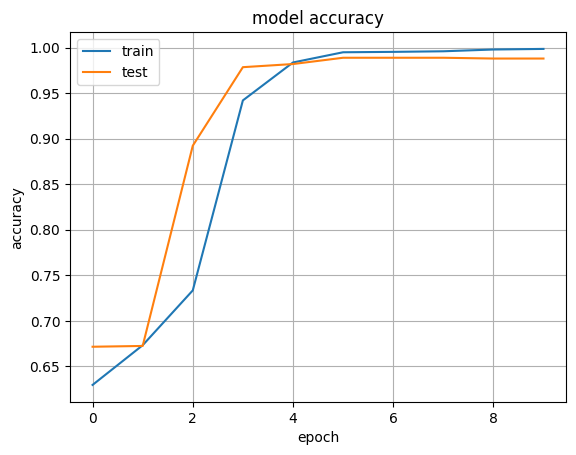

In [ ]:
from  matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
y_predict  = [1 if o>0.5 else 0 for o in model.predict(x_test_features)]

37/37 [==============================] - 3s 46ms/step


In [ ]:
confusionMatrix =confusion_matrix(test_y_labeled,y_predict)


In [ ]:
tn, fp, fn, tp = confusion_matrix(test_y_labeled,y_predict).ravel()


In [ ]:
print("Precision: {:.2f}%".format(100 * precision_score(test_y_labeled, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(test_y_labeled, y_predict)))
print("F1 Score: {:.2f}%".format(100 * f1_score(test_y_labeled,y_predict)))

Precision: 97.91%
Recall: 98.43%
F1 Score: 98.17%


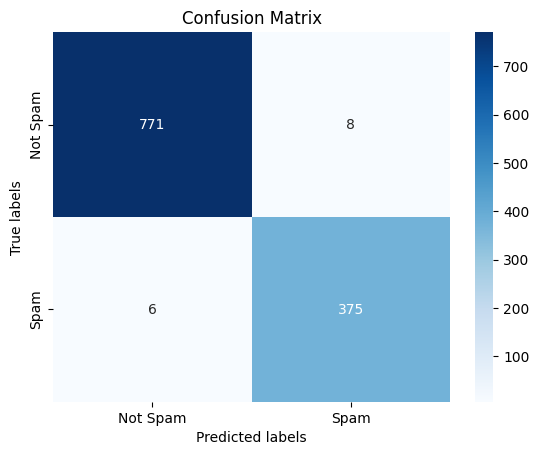

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(confusionMatrix, annot=True, ax = ax,cmap='Blues',fmt=''); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);

In [ ]:
#The second model Logistic Regression


logRegData = pd.read_csv("/content/Spam_Email_Data.csv",sep='\t') #the \t to seperate the data as in the csv file
logRegData = logRegData.dropna()

xTrain, xTest, yTrain, yTest = train_test_split(logRegData.text,logRegData.target,test_size = 0.2)

count_vector = CountVectorizer()
training_data = count_vector.fit_transform(xTrain).toarray()
testing_data = count_vector.transform(xTest).toarray()

In [ ]:
logReg_Model = LogisticRegression(random_state=0).fit(training_data, yTrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
predictions = logReg_Model.predict(testing_data)

In [ ]:
print('Accuracy score: ', format(accuracy_score(yTest, predictions)))
print('Precision score: ', format(precision_score(yTest, predictions)))
print('Recall score: ', format(recall_score(yTest, predictions)))
print('F1 score: ', format(f1_score(yTest, predictions)))

Accuracy score:  0.9982713915298185
Precision score:  0.997289972899729
Recall score:  0.997289972899729
F1 score:  0.997289972899729
